In [32]:
import matplotlib.image as mpimg

# Reading 'cover.png' image from file as an array of pixels
img_data = mpimg.imread('cover.png')

# number of pixels in the picture
img_data.shape

(536, 350)

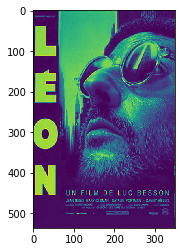

In [33]:
import matplotlib.pyplot as plt

# plotting the original image
plt.imshow(img_data)

In [34]:
import numpy as np

# convert floating point pixels to 8-bit integer (uint8)
for i in range(len(img_data)):
    for j in range(len(img_data[0])):
        img_data[i][j] *= 255
        
img_data = img_data.astype(np.uint8)

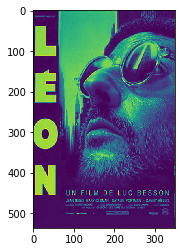

In [35]:
# checking the image again
plt.imshow(img_data)

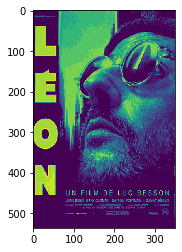

In [36]:
# setting least significant byte of each pixel to 0
for i in range(len(img_data)):
    for j in range(len(img_data[0])):
        img_data[i][j] = img_data[i][j] & 0b11110000

plt.imshow(img_data)

In [37]:
# string to be encoded in image's bytes
txt = "this is an encoded text"
np_txt = np.frombuffer(txt.encode(), dtype=np.uint8)
len(np_txt)

23

In [38]:
# convert 1 bytes to two 4 bit literals
bits_list = []
for byte in np_txt:
    left = byte & 0b11110000
    right = byte & 0b00001111
    bits_list.append(left)
    bits_list.append(right)
len(bits_list)

46

In [39]:
# encoding the text in image
k = 0
for i in range(len(img_data)):
    if k == (len(bits_list) - 1):
            break
    for j in range(len(img_data[0])):
        img_data[i][j] = img_data[i][j] | bits_list[k]
        k += 1
        if k == (len(bits_list) - 1):
            break

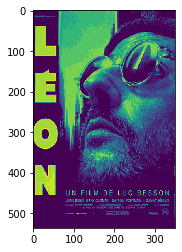

In [40]:
# checking to see any difference in the picture
plt.imshow(img_data)